<a href="https://colab.research.google.com/github/Koalajuni/fundamental_ai_projects/blob/main/InceptionV3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inception V3 테스트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#라이브러리 불러오기
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
#이미 학습된 모델: Pre-trained model 불러오기
model = InceptionV3(weights = 'imagenet', include_top = True)

1/1 [==============================] - 0s 462ms/step
[[('n02123159', 'tiger_cat', 0.95068073), ('n02123045', 'tabby', 0.026791267), ('n02124075', 'Egyptian_cat', 0.010464467), ('n02971356', 'carton', 0.0004864241), ('n03958227', 'plastic_bag', 0.00046730923)]]
Predicted: [[('n02123159', 'tiger_cat', 0.95068073), ('n02123045', 'tabby', 0.026791267), ('n02124075', 'Egyptian_cat', 0.010464467), ('n02971356', 'carton', 0.0004864241), ('n03958227', 'plastic_bag', 0.00046730923)]]


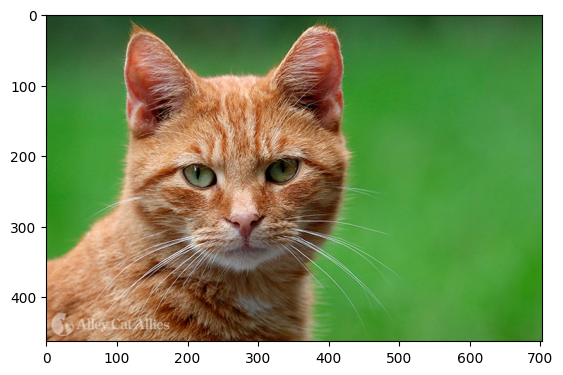

Top[1] => tiger_cat, 0.9506807327270508
Top[2] => tabby, 0.026791267096996307
Top[3] => Egyptian_cat, 0.010464467108249664
Top[4] => carton, 0.00048642410547472537
Top[5] => plastic_bag, 0.0004673092334996909
1/1 [==============================] - 0s 221ms/step
[[('n02124075', 'Egyptian_cat', 0.93808055), ('n02123159', 'tiger_cat', 0.016060295), ('n02123045', 'tabby', 0.015226985), ('n02127052', 'lynx', 0.008445703), ('n02125311', 'cougar', 0.001950762)]]
Predicted: [[('n02124075', 'Egyptian_cat', 0.93808055), ('n02123159', 'tiger_cat', 0.016060295), ('n02123045', 'tabby', 0.015226985), ('n02127052', 'lynx', 0.008445703), ('n02125311', 'cougar', 0.001950762)]]


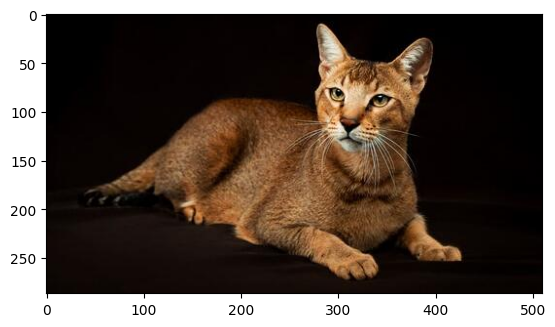

Top[1] => Egyptian_cat, 0.9380805492401123
Top[2] => tiger_cat, 0.016060294583439827
Top[3] => tabby, 0.015226985327899456
Top[4] => lynx, 0.00844570342451334
Top[5] => cougar, 0.0019507620017975569
1/1 [==============================] - 0s 226ms/step
[[('n02124075', 'Egyptian_cat', 0.38132638), ('n02123045', 'tabby', 0.22079593), ('n02123159', 'tiger_cat', 0.10449807), ('n02127052', 'lynx', 0.03386175), ('n02123394', 'Persian_cat', 0.0033036345)]]
Predicted: [[('n02124075', 'Egyptian_cat', 0.38132638), ('n02123045', 'tabby', 0.22079593), ('n02123159', 'tiger_cat', 0.10449807), ('n02127052', 'lynx', 0.03386175), ('n02123394', 'Persian_cat', 0.0033036345)]]


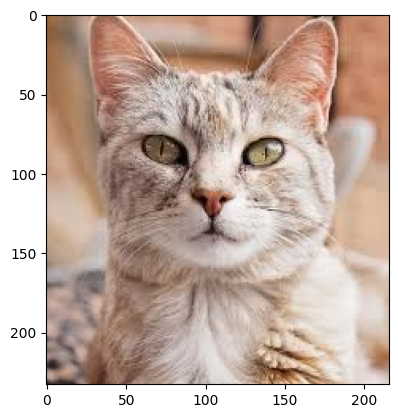

Top[1] => Egyptian_cat, 0.3813263773918152
Top[2] => tabby, 0.22079592943191528
Top[3] => tiger_cat, 0.10449807345867157
Top[4] => lynx, 0.03386174887418747
Top[5] => Persian_cat, 0.0033036344684660435
1/1 [==============================] - 0s 222ms/step
[[('n02123159', 'tiger_cat', 0.42246702), ('n02123394', 'Persian_cat', 0.15147518), ('n02123045', 'tabby', 0.14239292), ('n02124075', 'Egyptian_cat', 0.020792315), ('n02328150', 'Angora', 0.00785088)]]
Predicted: [[('n02123159', 'tiger_cat', 0.42246702), ('n02123394', 'Persian_cat', 0.15147518), ('n02123045', 'tabby', 0.14239292), ('n02124075', 'Egyptian_cat', 0.020792315), ('n02328150', 'Angora', 0.00785088)]]


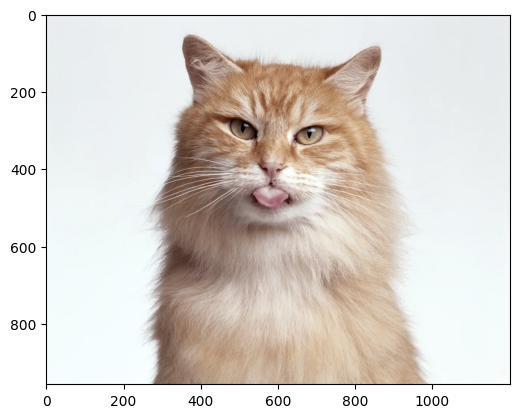

Top[1] => tiger_cat, 0.42246702313423157
Top[2] => Persian_cat, 0.15147517621517181
Top[3] => tabby, 0.14239291846752167
Top[4] => Egyptian_cat, 0.020792314782738686
Top[5] => Angora, 0.007850879803299904


In [ ]:
for i in range(1,5):
  img_path = f'./test_img/cat{i}.jpg'
  img = image.load_img(img_path, target_size=(299, 299))
  #이미지 형식에 맞게 수정
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  #이미지 전처리
  x = preprocess_input(x)
  #예측
  preds = model.predict(x)
  result = decode_predictions(preds, top=5)
  print(result)
  print('Predicted:', result)

  #이미지 표시
  plt.imshow(image.load_img(img_path))
  plt.show()

  #어떤 것을 검출했는지 확인
  for ii in range(5):
    print("Top[{}] => {}, {}".format(
        ii+1,
        result[0][ii][1],
        result[0][ii][2]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 환경설정

In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/MyDrive/dataset/

/content/drive/.shortcut-targets-by-id/1e31pCqfkv1hYZGaGqrjdqv5_p4b-_EEl/dataset


In [ ]:
!ls

food10	food10.zip  single_prediction  test_set  training_set


# 2. 라이브러리 및 데이터 처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense,Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [ ]:
# 학습데이터 Train 경로
data_dir = '/content/drive/MyDrive/dataset/food10/'
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)


Found 5113 files belonging to 10 classes.


In [ ]:
#데이터 인공지능이 학습 가능한 형태로 변환

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

width = 228
height = 228
batch_size = 32
channel = 3
image_shape = (width, height, channel)
image_size = (width, height)

In [ ]:
#데이터 변환
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='training')

Found 4094 images belonging to 10 classes.


In [ ]:
train_data.class_indices

{'bibimbap': 0,
 'chiffon_cake': 1,
 'donut': 2,
 'egg_roll': 3,
 'garlic_bread': 4,
 'gyoza': 5,
 'kabob': 6,
 'omelette': 7,
 'pizza': 8,
 'sashimi': 9}

In [ ]:
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='validation',
    shuffle = True)
#

Found 1019 images belonging to 10 classes.


In [ ]:
#클래스 명칭설정

num_classes = len(data.class_names)
data.class_names

['bibimbap',
 'chiffon_cake',
 'donut',
 'egg_roll',
 'garlic_bread',
 'gyoza',
 'kabob',
 'omelette',
 'pizza',
 'sashimi']

RuntimeError: pybind11::error_already_set: MISMATCH of original and normalized active exception types: ORIGINAL _NotOkStatusException REPLACED BY KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/core.py(42): __init__
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/gen_dataset_ops.py(3024): iterator_get_next
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/iterator_ops.py(773): _next_internal
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/iterator_ops.py(810): __next__
  <ipython-input-15-a5ec41394661>(5): show_image
  <ipython-input-15-a5ec41394661>(12): <cell line: 12>
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3553): run_code
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3473): run_ast_nodes
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3257): run_cell_async
  /usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py(78): _pseudo_sync_runner
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3030): _run_cell
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(2975): run_cell
  /usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py(539): run_cell
  /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py(302): do_execute
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(234): wrapper
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py(539): execute_request
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(234): wrapper
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py(261): dispatch_shell
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(234): wrapper
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py(361): process_one
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(786): run
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(825): inner
  /usr/local/lib/python3.10/dist-packages/tornado/ioloop.py(738): _run_callback
  /usr/local/lib/python3.10/dist-packages/tornado/ioloop.py(685): <lambda>
  /usr/lib/python3.10/asyncio/events.py(80): _run
  /usr/lib/python3.10/asyncio/base_events.py(1909): _run_once
  /usr/lib/python3.10/asyncio/base_events.py(603): run_forever
  /usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py(195): start
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py(619): start
  /usr/local/lib/python3.10/dist-packages/traitlets/config/application.py(992): launch_instance
  /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py(37): <module>
  /usr/lib/python3.10/runpy.py(86): _run_code
  /usr/lib/python3.10/runpy.py(196): _run_module_as_main


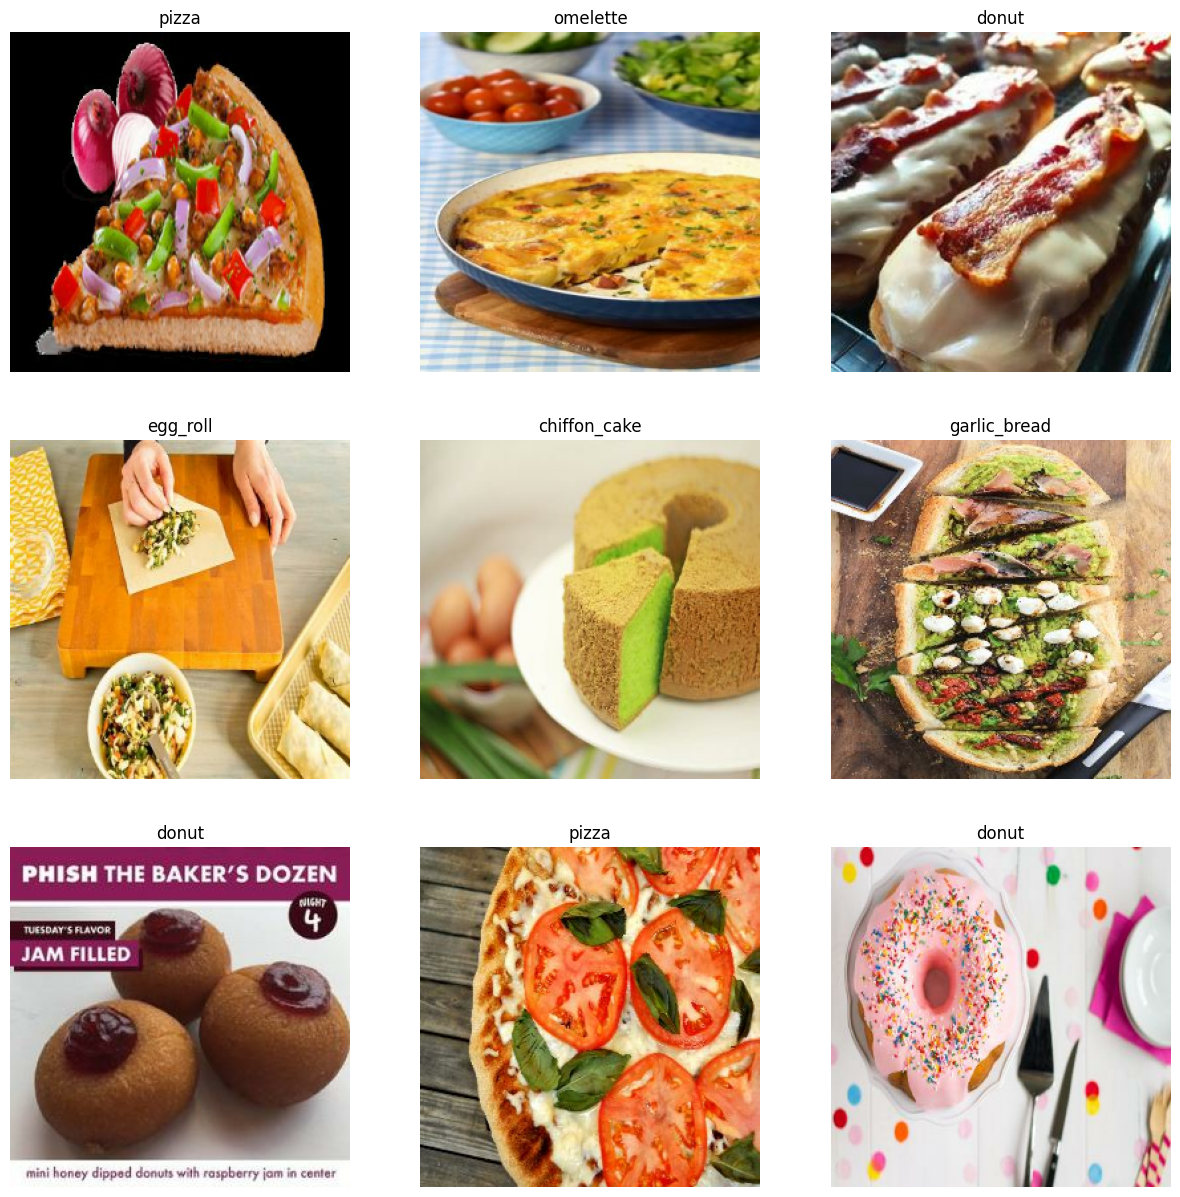

In [ ]:
#학습할 이미지에 대한 Preview
# 15 X 15 사이즈 이미지에서, 각 칸 마다 Image를 하나 선택해서 불러오기
def show_image(data):
    plt.figure(figsize=(15,15))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(data.class_names[labels[i]])
            plt.axis("off")

show_image(data)

# 3. 인공지능 알고리즘 설계

In [ ]:
pre_model = InceptionV3(
    weights = 'imagenet',
    include_top = False,
    input_shape = image_shape,
    pooling = 'avg')

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
pre_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 228, 228, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 113, 113, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 113, 113, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 113, 113, 32)         0         ['batch_normalizati

In [ ]:
#모델 설계
#Convolution 맨 마지막에 fully connected layers에서 어떻게 처리할지 정해준다.
x = pre_model.output
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x) #성능이 좋았던 paramters, hyperparameter 튜닝으로 학습 성능 증가한 parameter.
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation = 'softmax')(x)

In [ ]:
#모델 컴파일

model = Model(inputs = pre_model.input, outputs = predictions)
model.compile(optimizer = Adam(learning_rate = 0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 228, 228, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 113, 113, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 113, 113, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 113, 113, 32)         0         ['batch_normalization[0][0

In [ ]:
#단위한 학습량을 변수로 조정
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size
STEP_SIZE_TRAIN, STEP_SIZE_VALID

(127, 31)

In [ ]:
#CallBack 처리
from keras.callbacks import ModelCheckpoint

EPOCHS = 10 # 유료로 사용할 수 있게 됬을 때, 50으로 변경하면 좋을 것 같다.
filename = '/content/drive/MyDrive/train/ipv3-epoch_{epoch}.h5'
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')


In [ ]:
history = model.fit(
    train_data,
    steps_per_epoch = STEP_SIZE_TRAIN,
    validation_data = val_data,
    validation_steps = STEP_SIZE_VALID,
    epochs = EPOCHS,
    callbacks = [checkpoint])

Epoch 1/10
127/127 [==============================] - ETA: 0s - loss: 1.2617 - accuracy: 0.5982
Epoch 1: val_loss improved from inf to 1.06716, saving model to /content/drive/MyDrive/train/ipv3-epoch_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


127/127 [==============================] - 1417s 11s/step - loss: 1.2617 - accuracy: 0.5982 - val_loss: 1.0672 - val_accuracy: 0.6401
Epoch 2/10
127/127 [==============================] - ETA: 0s - loss: 0.8535 - accuracy: 0.7166
Epoch 2: val_loss improved from 1.06716 to 0.93355, saving model to /content/drive/MyDrive/train/ipv3-epoch_2.h5
127/127 [==============================] - 99s 780ms/step - loss: 0.8535 - accuracy: 0.7166 - val_loss: 0.9335 - val_accuracy: 0.7067
Epoch 3/10
127/127 [==============================] - ETA: 0s - loss: 0.6507 - accuracy: 0.7893
Epoch 3: val_loss improved from 0.93355 to 0.92982, saving model to /content/drive/MyDrive/train/ipv3-epoch_3.h5
127/127 [==============================] - 98s 771ms/step - loss: 0.6507 - accuracy: 0.7893 - val_loss: 0.9298 - val_accuracy: 0.7329
Epoch 4/10
127/127 [==============================] - ETA: 0s - loss: 0.5429 - accuracy: 0.8225
Epoch 4: val_loss did not improve from 0.92982
127/127 [============================